In [83]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore #for outlier
from scipy import stats # for plot normal distribution

In [84]:
# Load data

bronx_data = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_bronx.xlsx",skiprows=6)
bronx2020 = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_bronx.xlsx",skiprows=6,thousands=',')
brooklyn2020 = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_brooklyn.xlsx",skiprows=6,thousands=',')
manhattan2020 = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_manhattan.xlsx",skiprows=6,thousands=',')
queens2020 = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_queens.xlsx",skiprows=6,thousands=',')
statenisland2020 = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_staten_island.xlsx",skiprows=6,thousands=',')

# Load data for NYC price prediction 2021
bronx2021 = pd.read_excel("NYC_Housing_Dataset_2021/2021_bronx.xlsx",skiprows=6)
brooklyn2021 = pd.read_excel("NYC_Housing_Dataset_2021/2021_brooklyn.xlsx",skiprows=6)
manhattan2021 = pd.read_excel("NYC_Housing_Dataset_2021/2021_manhattan.xlsx",skiprows=6)
queens2021 = pd.read_excel("NYC_Housing_Dataset_2021/2021_queens.xlsx",skiprows=6)
statensisland2021 = pd.read_excel("NYC_Housing_Dataset_2021/2021_staten_island.xlsx",skiprows=6)

In [85]:
NYC = pd.concat([manhattan2020, manhattan2021,bronx2020, bronx2021,brooklyn2020,brooklyn2021, 
                 queens2020,queens2021,statenisland2020,statensisland2021], ignore_index=True)
NYC.columns = [c.replace('\n', '') for c in NYC.columns]
NYC.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIALUNITS,COMMERCIALUNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASSAT TIME OF SALE,SALE PRICE,SALE DATE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377.0,72.0,NaN,B9,231 EAST 7TH,NaN,...,2.0,0.0,2.0,1718.0,5154.0,1901.0,1.0,B9,0.0,2020-10-02
2,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,66.0,NaN,C0,243 EAST 7TH STREET,NaN,...,3.0,0.0,3.0,2381.0,3084.0,1899.0,1.0,C0,0.0,2020-10-31
3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,66.0,NaN,C0,243 EAST 7TH STREET,NaN,...,3.0,0.0,3.0,2381.0,3084.0,1899.0,1.0,C0,4350000.0,2020-07-16
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372.0,10.0,NaN,C7,274 EAST 3RD,NaN,...,9.0,1.0,10.0,2021.0,6445.0,1900.0,2.0,C7,0.0,2020-12-27
5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374.0,1.0,NaN,C7,301-303 EAST 4TH STREET,NaN,...,8.0,2.0,10.0,1501.0,6929.0,1900.0,2.0,C7,3672530.0,2020-11-24
6,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,28.0,NaN,C4,272 EAST 7TH STREET,NaN,...,24.0,0.0,24.0,2764.0,13206.0,1900.0,2.0,C4,1.0,2020-06-26
7,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,31.0,NaN,C4,"278 EAST 7TH STREET, 1A",NaN,...,19.0,0.0,19.0,2772.0,13248.0,1920.0,2.0,C4,2500.0,2020-02-11
8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,31.0,NaN,C4,"278 EAST 7TH STREET, 1B/2B",NaN,...,19.0,0.0,19.0,2772.0,13248.0,1920.0,2.0,C4,290000.0,2020-02-07
9,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,31.0,NaN,C4,"278 EAST 7TH STREET, 1C/1D",NaN,...,19.0,0.0,19.0,2772.0,13248.0,1920.0,2.0,C4,2500.0,2020-02-11


In [86]:
print(bronx2020)

      BOROUGH NEIGHBORHOOD         BUILDING CLASS CATEGORY  \
0         NaN          NaN                             NaN   
1         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
2         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
3         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
4         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
...       ...          ...                             ...   
6641      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6642      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6643      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6644      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6645      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   

     TAX CLASS AT PRESENT   BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
0                     NaN     NaN   NaN        NaN                       NaN   
1                       1  3029.0  36.0        NaN                        A5   
2              

In [87]:
print(bronx_data)

      BOROUGH NEIGHBORHOOD         BUILDING CLASS CATEGORY  \
0         NaN          NaN                             NaN   
1         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
2         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
3         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
4         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
...       ...          ...                             ...   
6641      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6642      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6643      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6644      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6645      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   

     TAX CLASS AT PRESENT   BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
0                     NaN     NaN   NaN        NaN                       NaN   
1                       1  3029.0  36.0        NaN                        A5   
2              

### Data Cleaning and Data Preprocessing 

In [88]:
## Duplicates

In [89]:
#Delete the duplicates and check that it worked
NYC = NYC.drop_duplicates(NYC.columns, keep='last')
sum(NYC.duplicated(NYC.columns))

0

In [90]:
## Uniqueness

In [91]:
#Check for the number of unique values for every column 
for i in NYC.columns:
  print(str(i) + ":" + str(NYC[i].nunique()))

BOROUGH:5
NEIGHBORHOOD:255
BUILDING CLASS CATEGORY:44
TAX CLASS AT PRESENT:10
BLOCK:12764
LOT:3505
EASE-MENT:0
BUILDING CLASS AT PRESENT:167
ADDRESS:159351
APARTMENT NUMBER:6670
ZIP CODE:195
RESIDENTIALUNITS:188
COMMERCIALUNITS:71
TOTAL UNITS:199
LAND SQUARE FEET:8177
GROSS SQUARE FEET:7520
YEAR BUILT:183
TAX CLASS AT TIME OF SALE:3
BUILDING CLASSAT TIME OF SALE:167
SALE PRICE:13678
SALE DATE:731


In [92]:
## Data type transformation 

Since there is no information in EASE-MENT columns, we will drop it initially. We will also drop the SALE DATE column as we are not considering the effect of time on the sale price. 

In [93]:
#Converting columns to respective datatype
categoricalData = ['BOROUGH','TAX CLASS AT PRESENT','BUILDING CLASS CATEGORY',
                    'TAX CLASS AT TIME OF SALE',
                    'BUILDING CLASS AT PRESENT',
                    'BUILDING CLASSAT TIME OF SALE']
for each in categoricalData:
    NYC[each] = NYC[each].astype('category')
NYC['LAND SQUARE FEET'] = pd.to_numeric(NYC['LAND SQUARE FEET'], errors='coerce')
NYC['GROSS SQUARE FEET']= pd.to_numeric(NYC['GROSS SQUARE FEET'], errors='coerce')
NYC['SALE PRICE'] = NYC['SALE PRICE'].replace('[CA\$,]', '', regex=True).astype(float) * 0.77 # convert to US dollars 
NYC = NYC.drop(columns=["SALE DATE", "EASE-MENT"])
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167775 entries, 1 to 167783
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   BOROUGH                        167774 non-null  category
 1   NEIGHBORHOOD                   167774 non-null  object  
 2   BUILDING CLASS CATEGORY        167774 non-null  category
 3   TAX CLASS AT PRESENT           167563 non-null  category
 4   BLOCK                          167774 non-null  float64 
 5   LOT                            167774 non-null  float64 
 6   BUILDING CLASS AT PRESENT      167563 non-null  category
 7   ADDRESS                        167774 non-null  object  
 8   APARTMENT NUMBER               40035 non-null   object  
 9   ZIP CODE                       167762 non-null  float64 
 10  RESIDENTIALUNITS               131344 non-null  float64 
 11  COMMERCIALUNITS                112230 non-null  float64 
 12  TOTAL UNITS     

In [94]:
## Missing values

In [95]:
# Drop LAND SQUARE FEET = 0, GROSS SQUARE FEET = 0, YEAR BUILT = 0   
NYC = NYC[NYC['LAND SQUARE FEET'] > 0]
NYC = NYC[NYC['GROSS SQUARE FEET'] > 0]
NYC = NYC[NYC['YEAR BUILT'] > 0]  
#Drop the missing values
NYC.dropna(how='all',axis=1,inplace=True)
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90241 entries, 1 to 167780
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   BOROUGH                        90241 non-null  category
 1   NEIGHBORHOOD                   90241 non-null  object  
 2   BUILDING CLASS CATEGORY        90241 non-null  category
 3   TAX CLASS AT PRESENT           90241 non-null  category
 4   BLOCK                          90241 non-null  float64 
 5   LOT                            90241 non-null  float64 
 6   BUILDING CLASS AT PRESENT      90241 non-null  category
 7   ADDRESS                        90241 non-null  object  
 8   APARTMENT NUMBER               792 non-null    object  
 9   ZIP CODE                       90241 non-null  float64 
 10  RESIDENTIALUNITS               90241 non-null  float64 
 11  COMMERCIALUNITS                90241 non-null  float64 
 12  TOTAL UNITS                    

In [96]:
##Check whether dropping nan worked 
NYC.isnull().sum()

BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 0
BLOCK                                0
LOT                                  0
BUILDING CLASS AT PRESENT            0
ADDRESS                              0
APARTMENT NUMBER                 89449
ZIP CODE                             0
RESIDENTIALUNITS                     0
COMMERCIALUNITS                      0
TOTAL UNITS                          0
LAND SQUARE FEET                     0
GROSS SQUARE FEET                    0
YEAR BUILT                           0
TAX CLASS AT TIME OF SALE            0
BUILDING CLASSAT TIME OF SALE        0
SALE PRICE                           0
dtype: int64

In [97]:
## Outliers

In this case, we will use Z score to detect the outliers in the columns of LAND SQUARE FEET, GROSS SQUARE FEET and SALE PRICE. 
Z score is a significant measure that tells how much a number is above or below the mean of the dataset in terms of standard deviation. We set the threshold=3

In [98]:
NYC['landSquare_zscore']=zscore(NYC['LAND SQUARE FEET'])
NYC.loc[NYC['landSquare_zscore'].abs()<=3]
print("The count of outliers in LAND SQUARE FEET is: {}".format(len((np.where(zscore(NYC['LAND SQUARE FEET']) > 3)[0]))))

NYC['grossSquare_zscore']=zscore(NYC['GROSS SQUARE FEET'])
NYC.loc[NYC['grossSquare_zscore'].abs()<=3]
print("The count of outliers in GROSS SQUARE FEET is: {}".format(len((np.where(zscore(NYC['GROSS SQUARE FEET']) > 3)[0]))))

NYC['salePrice_zscore']=zscore(NYC['SALE PRICE'])
NYC.loc[NYC['salePrice_zscore'].abs()<=3]
print("The count of outliers in SALE PRICE is: {}".format(len((np.where(zscore(NYC['SALE PRICE']) > 3)[0]))))

The count of outliers in LAND SQUARE FEET is: 79
The count of outliers in GROSS SQUARE FEET is: 478
The count of outliers in SALE PRICE is: 367


### Exploratory Data Analysis

### Target Variable[Sale Price]

##### Visualization of Raw Data

In [99]:
NYC['SALE PRICE'].describe()

count    9.024100e+04
mean     8.353422e+05
std      6.766940e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.657500e+05
75%      6.545000e+05
max      7.531296e+08
Name: SALE PRICE, dtype: float64

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 56.910382


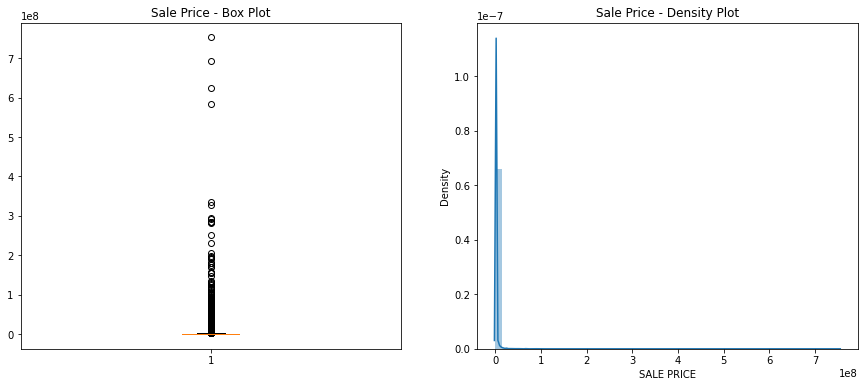

In [101]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.boxplot(NYC['SALE PRICE'])
plt.title('Sale Price - Box Plot')
plt.subplot(1,2,2)
sns.distplot(NYC['SALE PRICE'])
plt.title('Sale Price - Density Plot')
# Skewness
print("Skewness: %f" % NYC['SALE PRICE'].skew())
plt.show()

##### Range set-up & Log-Transformation

In [103]:
# Sale price percentage = $0
len(NYC.loc[NYC['SALE PRICE'] == 0 ])/len(NYC)

0.4039848849192717

In [104]:
# Sale price percentage < $50000
len(NYC.loc[NYC['SALE PRICE'] < 50000])/len(NYC)

0.4304695205062001

In [106]:
# Sale price percentage < 2000000
len(NYC.loc[NYC['SALE PRICE'] > 12000000 ])/len(NYC)

0.007635110426524529

##### Observation: 

It is observed that a lot of sales occur with an absurdly small number: \\$0  most commonly ( 40%  of the sale price =  \\$0 ). 
On the basis of the original data resource, it is noted that these sales are in effect transfers of deeds between parties. For instance, the transfer of ownership of the house from parents to the child after the parents move out for retirement. To handle this situation, a reasonable range for the sale price will be set up. The instances for which the sale price is greater than \\$12M and less than \\$50000 will be removed since it will help eliminate the special cases. Following which, log transformation can be performed. 

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

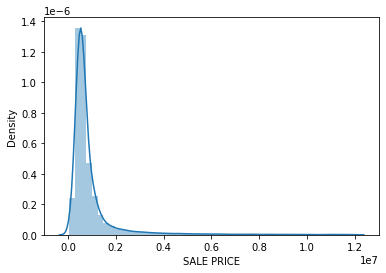

In [107]:
NYC = NYC[(NYC['SALE PRICE'] > 50000) & (NYC['SALE PRICE'] < 12000000)]
sns.distplot(NYC['SALE PRICE'])

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sale Price - Box Plot')

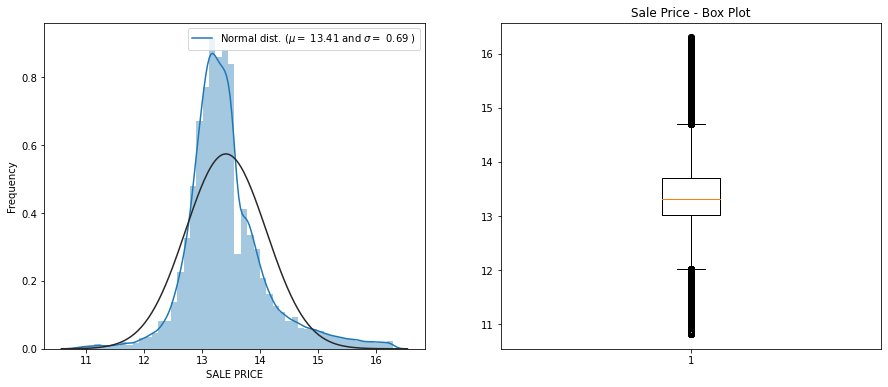

In [108]:
# log(x) transform

NYC["SALE PRICE"]=np.log(NYC["SALE PRICE"])

plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(NYC["SALE PRICE"], fit = stats.norm)
plt.ylabel('Frequency')
(mu, sigma) = stats.norm.fit(NYC["SALE PRICE"])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.subplot(1,2,2)
plt.boxplot(NYC['SALE PRICE'])
plt.title('Sale Price - Box Plot')

#### Feature Analysis and Selection 

In [110]:
NYC = NYC.drop(['salePrice_zscore', 'landSquare_zscore', 'grossSquare_zscore'],axis =1)
NYC.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIALUNITS',
       'COMMERCIALUNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASSAT TIME OF SALE', 'SALE PRICE'],
      dtype='object')

#### (i) Correlation 

<AxesSubplot:>

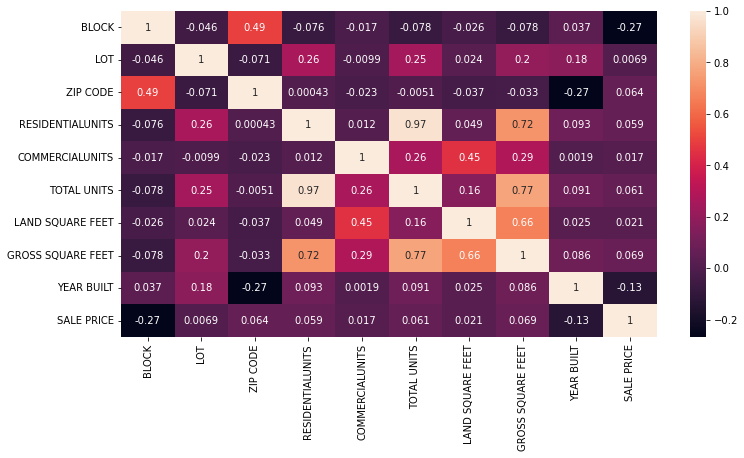

In [112]:
#Colinearity heatmap
corr = NYC.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

#### (ii) Feature Analysis and Selection

a. BOROUGH

Explanation: The name of the borough in which the property is located.

1 = Bronx\
2 = Brooklyn\
3 = Manhattan\
4 = Queens\
5 = Staten Island

<AxesSubplot:title={'center':'Mean Sale Price in each BOROUGH'}, xlabel='BOROUGH'>

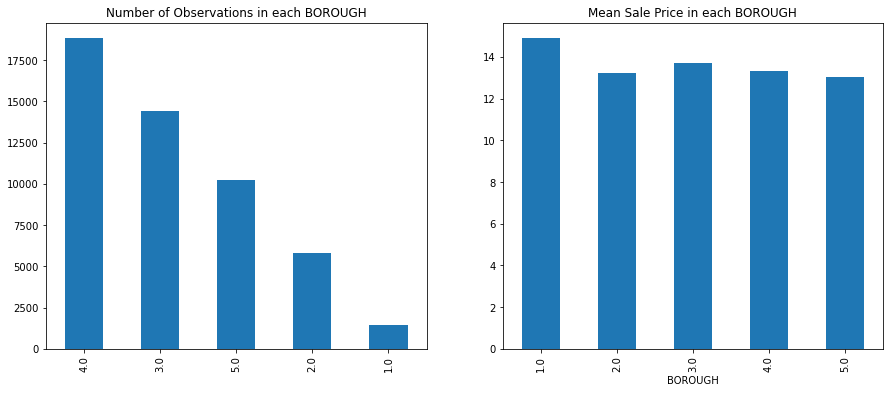

In [115]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Number of Observations in each BOROUGH")
NYC['BOROUGH'].value_counts().plot(kind='bar')

# Average price by borough
plt.subplot(1,2,2)
plt.title("Mean Sale Price in each BOROUGH")
NYC.groupby('BOROUGH').mean()['SALE PRICE'].plot(kind = 'bar')

C:\Users\Checkout\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


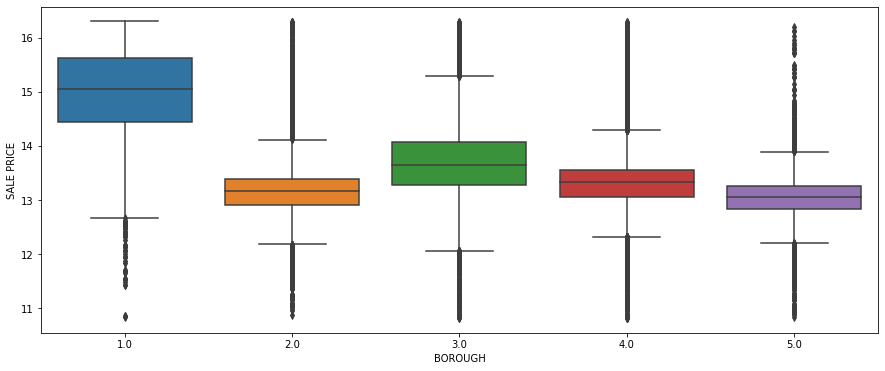

In [116]:
plt.figure(figsize=(15,6))
sns.boxplot(x=NYC['BOROUGH'].astype('category'), y = NYC['SALE PRICE'], data=pd.melt(NYC))
plt.show()

#### b. NEIGHBORHOOD

Explanation: While evaluating properties, the name of hte neighborhood is determined by the Department of Finance assessors. Although, the common name of the neighborhood is the same as designated by the Finance department, slight differences may occur when it comes to neighborhood boundary lines. It is also noted that a few sub-neighborhoods might not be included. 

Text(0, 0.5, 'Average sale price')

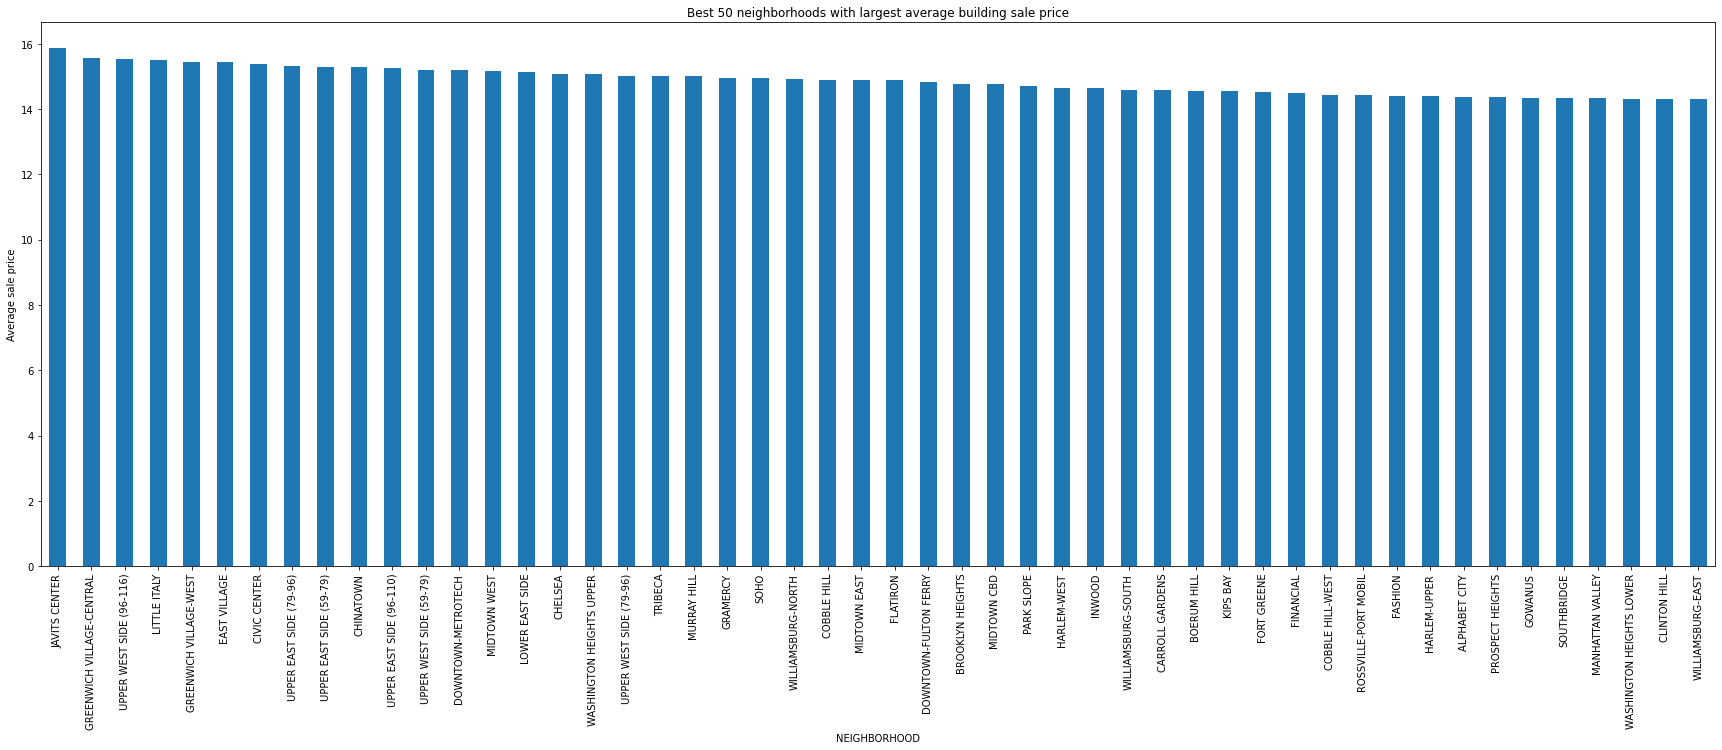

In [117]:
# Best 50 neighborhoods having largest average building sale price
plt.figure(figsize=(30,10))
NYC.groupby('NEIGHBORHOOD').mean()['SALE PRICE'].sort_values(ascending = False).head(50).plot(kind = 'bar')
plt.title("Best 50 neighborhoods with largest average building sale price")
plt.ylabel('Average sale price')

#### Building Class category

Explanation: To help the users of the Rolling Sales Files to identify similar properties by broad usage such as One Family Homes without having to look up Individual Buildign Classes,, this filed is included. The files are sorted by Borough, Neighborhood, Block, Building Class Category and Lot.  

In [119]:
NYC['BUILDING CLASS CATEGORY'].unique()

['03 THREE FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS', '14 RENTALS - 4-10 UNIT', '01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', ..., '35 INDOOR PUBLIC AND CULTURAL FACILITIES', '39 TRANSPORTATION FACILITIES', '27 FACTORIES', '36 OUTDOOR RECREATIONAL FACILITIES', '34 THEATRES']
Length: 23
Categories (44, object): ['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', '03 THREE FAMILY DWELLINGS', '04 TAX CLASS 1 CONDOS', ..., '46 CONDO STORE BUILDINGS', '47 CONDO NON-BUSINESS STORAGE', '48 CONDO TERRACES/GARDENS/CABANAS', '49 CONDO WAREHOUSES/FACTORY/INDUS']